In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-08-13 19:35:11.546053: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-13 19:35:11.866591: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-13 19:35:12.586066: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/RJ_Reconstrucao_Sciaenidae_2024_08_06.xlsx')
df_totais = pd.DataFrame(df[['Ano','TOTAL_FISHES_M','TOTAL_FISHES_F&M']])

dados = df_totais.dropna().reset_index(drop=True)

#Fazendo as proporções de ostra_art em relação a mexilhao_art
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_TOTAL_FISHES_M'] = dados.loc[i,'TOTAL_FISHES_M'] / dados.loc[i,'TOTAL_FISHES_F&M']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1978])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()


prop = dados['Prop_TOTAL_FISHES_M'].values
dados.head()

,Ano,TOTAL_FISHES_M,TOTAL_FISHES_F&M,Prop_TOTAL_FISHES_M
0,1976,101753.0,102658.0,0.991184
1,1977,116327.0,117813.0,0.987387
2,1979,136853.0,137847.0,0.992789
3,1980,143403.0,144298.0,0.993798
4,1981,138243.0,138923.0,0.995105


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std

In [4]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=500, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/TOTAL_FISHES/pesos TOTAL_FISHES_M/.weights.h5', overwrite=True)

Epoch 1/500


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.9868
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9270
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8849
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8395
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7850
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7215
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6473
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5667
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4857
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4100
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3474
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3066
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2892
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2860
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2875
Epoch 16/500
1/1 ━━━━━━━━━━━━━━━━

In [5]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/TOTAL_FISHES/pesos TOTAL_FISHES_M/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[0.99693936]
 [0.99668926]
 [0.99643993]
 [0.99618894]
 [0.99593896]
 [0.99569005]
 [0.9954411 ]
 [0.99519217]
 [0.9949434 ]
 [0.9946941 ]
 [0.99444   ]
 [0.9941829 ]
 [0.99392766]
 [0.99367094]
 [0.9934086 ]
 [0.99314165]
 [0.99288946]
 [0.992637  ]
 [0.99239206]
 [0.99214816]
 [0.9918827 ]
 [0.9915911 ]
 [0.9912851 ]
 [0.9909687 ]
 [0.99064636]
 [0.9903203 ]
 [0.9895871 ]]


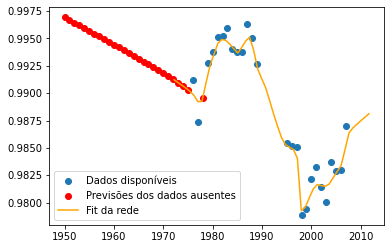

In [6]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>=1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

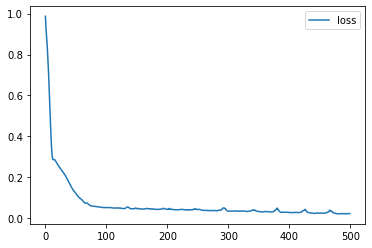

In [7]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [9]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

#Trazendo valores previstos para TOTAL_FISHES_F&M
df_prev_FM = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/TOTAL_FISHES/Previsão TOTAL_FISHES_F&M_1950-1955.xlsx')


for i in range(len(df_prev_FM['Ano'])):
    if pd.isnull(df.loc[i,'TOTAL_FISHES_F&M'])==True:
       df.loc[i,'TOTAL_FISHES_F&M'] = df_prev_FM.loc[i,'TOTAL_FISHES_F&M']


df_preenchido = df[['Ano','TOTAL_FISHES_M']]
for i in range(len(prev_continua)):
    if i+1950 in anos_para_prever:
      df_preenchido.loc[i,'TOTAL_FISHES_M']=df.loc[i,'TOTAL_FISHES_F&M']*prev_continua[i]


with pd.option_context('display.max_rows', None,):
    print(df_preenchido)


#Planilha com os dados preenchidos
df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/TOTAL_FISHES/Previsão TOTAL_FISHES_M_1950-1978.xlsx')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
     Ano  TOTAL_FISHES_M
0   1950    24948.511719
1   1951    24113.437500
2   1952    23215.751953
3   1953    21189.013672
4   1954    19442.503906
5   1955    23910.060547
6   1956    23075.320312
7   1957    16350.011719
8   1958    16569.787109
9   1959    21242.687500
10  1960    21978.119141
11  1961    16489.517578
12  1962    35885.757812
13  1963    41604.007812
14  1964    46353.441406
15  1965    39068.207031
16  1966    38277.875000
17  1967    61418.421875
18  1968    75692.718750
19  1969    85162.031250
20  1970    64952.445312
21  1971   103798.765625
22  1972   120300.375000
23  1973   144271.171875
24  1974    54422.148438
25  1975   133766.531250
26  1976   101753.000000
27  1977   116327.000000
28  1978   137524.906250
29  1979   136853.000000
30  1980   143403.000000
31  1981   138243.000000
32  1982   138915.000000
33  1983   155258.000000
34  1984   172724.000000
35  1985   191235.000000
36  1986   186541.000000
37  1987   2